Graphical Analysis is between line 99 and the end. 

In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [2]:
p = str(os.getcwd())

In [3]:
filepath = Path(p)

In [4]:
filepath

PosixPath('/Users/coreywalker/Desktop/UAH/Hydrology/data/Berm_2020_Analysis')

In [5]:
files = list(filepath.glob(f'*.csv'))

In [6]:
files

[PosixPath('/Users/coreywalker/Desktop/UAH/Hydrology/data/Berm_2020_Analysis/brm_20200618_sfc.csv'),
 PosixPath('/Users/coreywalker/Desktop/UAH/Hydrology/data/Berm_2020_Analysis/brm_20200619_sfc.csv'),
 PosixPath('/Users/coreywalker/Desktop/UAH/Hydrology/data/Berm_2020_Analysis/brm_20200615_sfc.csv'),
 PosixPath('/Users/coreywalker/Desktop/UAH/Hydrology/data/Berm_2020_Analysis/brm_20200614_sfc.csv'),
 PosixPath('/Users/coreywalker/Desktop/UAH/Hydrology/data/Berm_2020_Analysis/brm_20200620_sfc.csv'),
 PosixPath('/Users/coreywalker/Desktop/UAH/Hydrology/data/Berm_2020_Analysis/brm_20200616_sfc.csv'),
 PosixPath('/Users/coreywalker/Desktop/UAH/Hydrology/data/Berm_2020_Analysis/brm_20200617_sfc.csv')]

In [7]:
column_names = {0:'Program Constant', 1:'Year',
 2: 'Julian Day', 3: 'Hour (UTC)', 4: 'Minute, Seconds (UTC)',
 5: 'Pressure - (mb)', 6: '2-m Temperature (F)',
 7: 'RH (%)', 8: '10-m Temp (F)', 9: 'Wind Speed at 10m (m/s)',
 10: 'Wind Direction at 10m (deg)',
 11: 'Solar Radiation (W/m^2)',
 13: '0.5-m Temperature (F)',
 14: '1-m Temperature (F)'}

In [8]:
df = pd.concat([pd.read_csv(f, header=None) for f in files])

In [9]:
df.drop(columns=12, inplace=True)

In [10]:
df.rename(columns=column_names, inplace=True)

In [11]:
avg = df.groupby(df['Julian Day']).mean()
avg

,Program Constant,Year,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F)
Julian Day,,,,,,,,,,,,,
166,101.0,2020.0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582
167,101.0,2020.0,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026
168,101.0,2020.0,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781
169,101.0,2020.0,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521
170,101.0,2020.0,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148
171,101.0,2020.0,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075
172,101.0,2020.0,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541


In [12]:
year_func = lambda x: str(x)[2:4]

In [13]:
avg['str_julian_year'] = avg['Year'].apply(year_func)

In [14]:
avg.reset_index(inplace=True)
avg['Julian Day'] = avg['Julian Day'].astype(str)

In [15]:
avg.dtypes

Julian Day                      object
Program Constant               float64
Year                           float64
Hour (UTC)                     float64
Minute, Seconds (UTC)          float64
Pressure - (mb)                float64
2-m Temperature (F)            float64
RH (%)                         float64
10-m Temp (F)                  float64
Wind Speed at 10m (m/s)        float64
Wind Direction at 10m (deg)    float64
Solar Radiation (W/m^2)        float64
0.5-m Temperature (F)          float64
1-m Temperature (F)            float64
str_julian_year                 object
dtype: object

In [16]:
avg['julian time'] = avg['str_julian_year'] + avg['Julian Day']

In [17]:
avg

,Julian Day,Program Constant,Year,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),str_julian_year,julian time
0,166,101.0,2020.0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,20,20166
1,167,101.0,2020.0,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,20,20167
2,168,101.0,2020.0,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,20,20168
3,169,101.0,2020.0,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,20,20169
4,170,101.0,2020.0,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,20,20170
5,171,101.0,2020.0,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,20,20171
6,172,101.0,2020.0,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,20,20172


In [18]:
avg['julian time'] = pd.to_datetime(avg['julian time'], format='%y%j')

In [19]:
avg.drop(columns=['Julian Day', 'str_julian_year', 'Year', 'Program Constant'], inplace=True)

In [20]:
avg.set_index('julian time')

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F)
julian time,,,,,,,,,,,
2020-06-14,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582
2020-06-15,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026
2020-06-16,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781
2020-06-17,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521
2020-06-18,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148
2020-06-19,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075
2020-06-20,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541


In [21]:
def F_C_temp_converter(F):
    C = (F-32) * 5/9
    return C

In [22]:
avg['10-m Temp Celcius'] = avg['10-m Temp (F)'].apply(lambda x: F_C_temp_converter(x))

In [23]:
import math

In [24]:
avg['slope'] = avg['10-m Temp (F)'].apply(lambda x: math.exp((17.27 * x)/(x + 237.3))*0.6108*4098 / ((x+237.3)**2)
)

In [25]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),julian time,10-m Temp Celcius,slope
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,2020-06-14,24.128279,1.648916
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,2020-06-15,22.384188,1.473164
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,2020-06-16,21.667759,1.405498
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,2020-06-17,22.043734,1.440688
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,2020-06-18,22.681591,1.502014
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,2020-06-19,24.787223,1.719547
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,2020-06-20,26.461006,1.909919


In [26]:
wind_speed_corrector = lambda x: x * ((4.87) / np.log((67.8*10)-5.42))

In [27]:
avg['Wind Speed 2m Corrected'] = avg['Wind Speed at 10m (m/s)'].apply(wind_speed_corrector)

In [28]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),julian time,10-m Temp Celcius,slope,Wind Speed 2m Corrected
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,2020-06-14,24.128279,1.648916,1.132383
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,2020-06-15,22.384188,1.473164,1.506413
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,2020-06-16,21.667759,1.405498,1.119263
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,2020-06-17,22.043734,1.440688,1.190743
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,2020-06-18,22.681591,1.502014,0.775550
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,2020-06-19,24.787223,1.719547,0.833449
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,2020-06-20,26.461006,1.909919,0.859619


In [29]:
Radiation_converter = lambda x: x * 0.0864

In [30]:
avg['Solar Radiation (W/M^2/D^-1)'] = avg['Solar Radiation (W/m^2)'].apply(Radiation_converter)

In [31]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),julian time,10-m Temp Celcius,slope,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1)
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,2020-06-14,24.128279,1.648916,1.132383,23.989212
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,2020-06-15,22.384188,1.473164,1.506413,25.540423
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,2020-06-16,21.667759,1.405498,1.119263,18.654335
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,2020-06-17,22.043734,1.440688,1.190743,17.835425
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,2020-06-18,22.681591,1.502014,0.775550,20.773233
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,2020-06-19,24.787223,1.719547,0.833449,21.297904
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,2020-06-20,26.461006,1.909919,0.859619,24.035417


In [32]:
avg['2-m Temperature (Celcius)'] = avg['2-m Temperature (F)'].apply(F_C_temp_converter)

In [33]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),julian time,10-m Temp Celcius,slope,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1),2-m Temperature (Celcius)
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,2020-06-14,24.128279,1.648916,1.132383,23.989212,24.222473
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,2020-06-15,22.384188,1.473164,1.506413,25.540423,22.703307
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,2020-06-16,21.667759,1.405498,1.119263,18.654335,21.853933
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,2020-06-17,22.043734,1.440688,1.190743,17.835425,22.276370
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,2020-06-18,22.681591,1.502014,0.775550,20.773233,22.911627
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,2020-06-19,24.787223,1.719547,0.833449,21.297904,25.003666
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,2020-06-20,26.461006,1.909919,0.859619,24.035417,26.705154


In [34]:
pressure_converter = lambda x: x*0.1

In [35]:
avg['Pressure - (kPa)'] = avg['Pressure - (mb)'].apply(pressure_converter)

In [36]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),julian time,10-m Temp Celcius,slope,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1),2-m Temperature (Celcius),Pressure - (kPa)
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,2020-06-14,24.128279,1.648916,1.132383,23.989212,24.222473,99.622444
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,2020-06-15,22.384188,1.473164,1.506413,25.540423,22.703307,99.754261
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,2020-06-16,21.667759,1.405498,1.119263,18.654335,21.853933,99.755505
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,2020-06-17,22.043734,1.440688,1.190743,17.835425,22.276370,99.547595
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,2020-06-18,22.681591,1.502014,0.775550,20.773233,22.911627,99.352517
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,2020-06-19,24.787223,1.719547,0.833449,21.297904,25.003666,99.392494
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,2020-06-20,26.461006,1.909919,0.859619,24.035417,26.705154,99.356426


In [37]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),julian time,10-m Temp Celcius,slope,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1),2-m Temperature (Celcius),Pressure - (kPa)
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,2020-06-14,24.128279,1.648916,1.132383,23.989212,24.222473,99.622444
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,2020-06-15,22.384188,1.473164,1.506413,25.540423,22.703307,99.754261
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,2020-06-16,21.667759,1.405498,1.119263,18.654335,21.853933,99.755505
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,2020-06-17,22.043734,1.440688,1.190743,17.835425,22.276370,99.547595
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,2020-06-18,22.681591,1.502014,0.775550,20.773233,22.911627,99.352517
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,2020-06-19,24.787223,1.719547,0.833449,21.297904,25.003666,99.392494
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,2020-06-20,26.461006,1.909919,0.859619,24.035417,26.705154,99.356426


In [38]:
def DT_func(slope, windspeed):
    DT = slope/(slope + (0.00065*(1+(0.34*windspeed))))
    return DT

In [39]:
avg['DT'] = avg[['slope', 'Wind Speed 2m Corrected']].apply(lambda x: DT_func(*x), axis=1)

In [40]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),julian time,10-m Temp Celcius,slope,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1),2-m Temperature (Celcius),Pressure - (kPa),DT
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,2020-06-14,24.128279,1.648916,1.132383,23.989212,24.222473,99.622444,0.999454
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,2020-06-15,22.384188,1.473164,1.506413,25.540423,22.703307,99.754261,0.999333
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,2020-06-16,21.667759,1.405498,1.119263,18.654335,21.853933,99.755505,0.999362
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,2020-06-17,22.043734,1.440688,1.190743,17.835425,22.276370,99.547595,0.999367
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,2020-06-18,22.681591,1.502014,0.775550,20.773233,22.911627,99.352517,0.999453
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,2020-06-19,24.787223,1.719547,0.833449,21.297904,25.003666,99.392494,0.999515
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,2020-06-20,26.461006,1.909919,0.859619,24.035417,26.705154,99.356426,0.999560


In [41]:
def PT_func(slope, windspeed): 
    PT = 0.00065/(slope + (0.00065*(1+(0.34*windspeed))))
    return PT

In [42]:
avg['PT'] = avg[['slope', 'Wind Speed 2m Corrected']].apply(lambda x: PT_func(*x), axis=1)

In [43]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F),julian time,10-m Temp Celcius,slope,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1),2-m Temperature (Celcius),Pressure - (kPa),DT,PT
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,75.624582,2020-06-14,24.128279,1.648916,1.132383,23.989212,24.222473,99.622444,0.999454,0.000394
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,73.169026,2020-06-15,22.384188,1.473164,1.506413,25.540423,22.703307,99.754261,0.999333,0.000441
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,71.617781,2020-06-16,21.667759,1.405498,1.119263,18.654335,21.853933,99.755505,0.999362,0.000462
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,72.364521,2020-06-17,22.043734,1.440688,1.190743,17.835425,22.276370,99.547595,0.999367,0.000451
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,73.740148,2020-06-18,22.681591,1.502014,0.775550,20.773233,22.911627,99.352517,0.999453,0.000433
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,77.573075,2020-06-19,24.787223,1.719547,0.833449,21.297904,25.003666,99.392494,0.999515,0.000378
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,80.598541,2020-06-20,26.461006,1.909919,0.859619,24.035417,26.705154,99.356426,0.999560,0.000340


In [44]:
def TT_func(mean_temp, windspeed): 
    TT = (900/(mean_temp + 273))*windspeed
    return TT

In [45]:
avg['TT'] = avg[['10-m Temp Celcius', 'Wind Speed 2m Corrected']].apply(lambda x: TT_func(*x), axis=1)

In [46]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,julian time,10-m Temp Celcius,slope,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1),2-m Temperature (Celcius),Pressure - (kPa),DT,PT,TT
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,2020-06-14,24.128279,1.648916,1.132383,23.989212,24.222473,99.622444,0.999454,0.000394,3.429983
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,2020-06-15,22.384188,1.473164,1.506413,25.540423,22.703307,99.754261,0.999333,0.000441,4.589860
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,2020-06-16,21.667759,1.405498,1.119263,18.654335,21.853933,99.755505,0.999362,0.000462,3.418552
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,2020-06-17,22.043734,1.440688,1.190743,17.835425,22.276370,99.547595,0.999367,0.000451,3.632236
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,2020-06-18,22.681591,1.502014,0.775550,20.773233,22.911627,99.352517,0.999453,0.000433,2.360629
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,2020-06-19,24.787223,1.719547,0.833449,21.297904,25.003666,99.392494,0.999515,0.000378,2.518926
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,2020-06-20,26.461006,1.909919,0.859619,24.035417,26.705154,99.356426,0.999560,0.000340,2.583499


In [47]:
vapor_pressure = lambda x: 0.6108*(math.exp((17.27*x)/(x+237.3)))

In [48]:
avg['vapor pressure (kPa)'] = avg['10-m Temp Celcius'].apply(vapor_pressure)

In [49]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,10-m Temp Celcius,slope,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1),2-m Temperature (Celcius),Pressure - (kPa),DT,PT,TT,vapor pressure (kPa)
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,24.128279,1.648916,1.132383,23.989212,24.222473,99.622444,0.999454,0.000394,3.429983,3.006970
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,22.384188,1.473164,1.506413,25.540423,22.703307,99.754261,0.999333,0.000441,4.589860,2.706481
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,21.667759,1.405498,1.119263,18.654335,21.853933,99.755505,0.999362,0.000462,3.418552,2.590861
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,22.043734,1.440688,1.190743,17.835425,22.276370,99.547595,0.999367,0.000451,3.632236,2.650987
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,22.681591,1.502014,0.775550,20.773233,22.911627,99.352517,0.999453,0.000433,2.360629,2.755784
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,24.787223,1.719547,0.833449,21.297904,25.003666,99.392494,0.999515,0.000378,2.518926,3.127850
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,26.461006,1.909919,0.859619,24.035417,26.705154,99.356426,0.999560,0.000340,2.583499,3.454140


In [50]:
max_values = df.groupby(df['Julian Day']).max()
min_values = df.groupby(df['Julian Day']).min()
max_values.reset_index(inplace=True)
min_values.reset_index(inplace=True)

In [51]:
max_values

,Julian Day,Program Constant,Year,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),1-m Temperature (F)
0,166,101,2020,2359,55,998.0833,88.60397,85.29839,87.02657,12.3480,354.6,1028.376,90.05148,92.41293
1,167,101,2020,2359,55,999.0922,81.10378,86.44962,79.53300,8.3300,354.6,1059.117,82.16039,84.94322
2,168,101,2020,2359,55,999.3578,79.81609,81.69109,78.87228,5.9192,354.5,1129.649,81.02451,83.13521
3,169,101,2020,2359,55,997.0570,78.84159,75.95022,77.37947,6.8208,354.6,1223.189,80.43756,82.58078
4,170,101,2020,2359,55,995.0366,84.82156,92.73189,83.77681,4.8608,354.6,1189.785,85.68255,88.29247
5,171,101,2020,2359,55,996.0215,88.47952,89.77868,87.06380,4.9196,354.5,1145.335,89.16066,91.56639
6,172,101,2020,2359,55,995.4338,91.94200,87.80285,90.72845,5.3312,354.5,1060.389,93.17050,96.12263


In [52]:
avg['tmax'] = max_values['10-m Temp (F)'].apply(F_C_temp_converter)

In [53]:
avg['tmin'] = min_values['10-m Temp (F)'].apply(F_C_temp_converter)

In [54]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,Wind Speed 2m Corrected,Solar Radiation (W/M^2/D^-1),2-m Temperature (Celcius),Pressure - (kPa),DT,PT,TT,vapor pressure (kPa),tmax,tmin
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,1.132383,23.989212,24.222473,99.622444,0.999454,0.000394,3.429983,3.006970,30.570317,17.740572
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,1.506413,25.540423,22.703307,99.754261,0.999333,0.000441,4.589860,2.706481,26.407222,17.495450
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,1.119263,18.654335,21.853933,99.755505,0.999362,0.000462,3.418552,2.590861,26.040156,17.270172
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,1.190743,17.835425,22.276370,99.547595,0.999367,0.000451,3.632236,2.650987,25.210817,17.966733
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,0.775550,20.773233,22.911627,99.352517,0.999453,0.000433,2.360629,2.755784,28.764894,17.158172
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,0.833449,21.297904,25.003666,99.392494,0.999515,0.000378,2.518926,3.127850,30.591000,18.954283
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,0.859619,24.035417,26.705154,99.356426,0.999560,0.000340,2.583499,3.454140,32.626917,20.485289


In [55]:
E_tmax_func = lambda x: 0.6108*math.exp((17.27*x)/(x+237.3))
E_tmin_func = lambda x: 0.6108*math.exp((17.27*x)/(x+237.3))

In [56]:
avg['e_tmax'] = avg['tmax'].apply(E_tmax_func)
avg['e_tmin'] = avg['tmin'].apply(E_tmin_func)

In [57]:
avg['RH max'] = max_values['RH (%)']
avg['RH min'] = min_values['RH (%)']

In [58]:
avg['Mean es'] = (avg['e_tmax'] + avg['e_tmin']) / 2

In [59]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,PT,TT,vapor pressure (kPa),tmax,tmin,e_tmax,e_tmin,RH max,RH min,Mean es
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,0.000394,3.429983,3.006970,30.570317,17.740572,4.383854,2.030561,85.29839,26.56408,3.207208
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,0.000441,4.589860,2.706481,26.407222,17.495450,3.443212,1.999413,86.44962,33.58884,2.721312
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,0.000462,3.418552,2.590861,26.040156,17.270172,3.369427,1.971156,81.69109,40.87888,2.670292
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,0.000451,3.632236,2.650987,25.210817,17.966733,3.207775,2.059676,75.95022,46.73872,2.633726
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,0.000433,2.360629,2.755784,28.764894,17.158172,3.951575,1.957238,92.73189,42.50636,2.954406
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,0.000378,2.518926,3.127850,30.591000,18.954283,4.389036,2.191134,89.77868,36.98281,3.290085
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,0.000340,2.583499,3.454140,32.626917,20.485289,4.925834,2.409454,87.80285,32.10901,3.667644


In [60]:
def ea_func(et_min, RH_max, et_max, RH_min): 
    EA = ((et_min*(RH_max/100))+(et_max*(RH_min/100)))/2
    return EA

In [61]:
avg['Ea'] = avg[['e_tmin', 'RH max', 'e_tmax', 'RH min']].apply(lambda x: ea_func(*x), axis=1)

In [62]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,TT,vapor pressure (kPa),tmax,tmin,e_tmax,e_tmin,RH max,RH min,Mean es,Ea
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,3.429983,3.006970,30.570317,17.740572,4.383854,2.030561,85.29839,26.56408,3.207208,1.448283
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,4.589860,2.706481,26.407222,17.495450,3.443212,1.999413,86.44962,33.58884,2.721312,1.442510
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,3.418552,2.590861,26.040156,17.270172,3.369427,1.971156,81.69109,40.87888,2.670292,1.493821
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,3.632236,2.650987,25.210817,17.966733,3.207775,2.059676,75.95022,46.73872,2.633726,1.531801
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,2.360629,2.755784,28.764894,17.158172,3.951575,1.957238,92.73189,42.50636,2.954406,1.747327
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,2.518926,3.127850,30.591000,18.954283,4.389036,2.191134,89.77868,36.98281,3.290085,1.795180
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,2.583499,3.454140,32.626917,20.485289,4.925834,2.409454,87.80285,32.10901,3.667644,1.848603


In [63]:
dr_func = lambda x: 1 + (0.033*math.cos((2*math.pi/365)*x))

In [64]:
avg['Julian Day'] = max_values['Julian Day']

In [65]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,vapor pressure (kPa),tmax,tmin,e_tmax,e_tmin,RH max,RH min,Mean es,Ea,Julian Day
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,3.006970,30.570317,17.740572,4.383854,2.030561,85.29839,26.56408,3.207208,1.448283,166
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,2.706481,26.407222,17.495450,3.443212,1.999413,86.44962,33.58884,2.721312,1.442510,167
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,2.590861,26.040156,17.270172,3.369427,1.971156,81.69109,40.87888,2.670292,1.493821,168
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,2.650987,25.210817,17.966733,3.207775,2.059676,75.95022,46.73872,2.633726,1.531801,169
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,2.755784,28.764894,17.158172,3.951575,1.957238,92.73189,42.50636,2.954406,1.747327,170
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,3.127850,30.591000,18.954283,4.389036,2.191134,89.77868,36.98281,3.290085,1.795180,171
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,3.454140,32.626917,20.485289,4.925834,2.409454,87.80285,32.10901,3.667644,1.848603,172


In [66]:
avg['dr'] = avg['Julian Day'].apply(dr_func)

In [67]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,tmax,tmin,e_tmax,e_tmin,RH max,RH min,Mean es,Ea,Julian Day,dr
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,30.570317,17.740572,4.383854,2.030561,85.29839,26.56408,3.207208,1.448283,166,0.968322
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,26.407222,17.495450,3.443212,1.999413,86.44962,33.58884,2.721312,1.442510,167,0.968168
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,26.040156,17.270172,3.369427,1.971156,81.69109,40.87888,2.670292,1.493821,168,0.968023
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,25.210817,17.966733,3.207775,2.059676,75.95022,46.73872,2.633726,1.531801,169,0.967887
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,28.764894,17.158172,3.951575,1.957238,92.73189,42.50636,2.954406,1.747327,170,0.967761
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,30.591000,18.954283,4.389036,2.191134,89.77868,36.98281,3.290085,1.795180,171,0.967645
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,32.626917,20.485289,4.925834,2.409454,87.80285,32.10901,3.667644,1.848603,172,0.967538


In [68]:
Solar_Declination_func = lambda x: 0.0409*math.sin(((2*math.pi/365)*x)-1.39)

In [69]:
avg['Solar_Declination'] = avg['Julian Day'].apply(Solar_Declination_func)

In [70]:
avg['latitude'] = 32.723
avg['longitude'] = 86.642
avg['elevation'] = 686

In [71]:
def ss_hour_angle(lat, solar_declination):
    angle = np.arccos((-math.tan(lat)*math.tan(solar_declination)))
    return angle

In [72]:
avg['SS hour angle'] = avg[['latitude', 'Solar_Declination']].apply(lambda x: ss_hour_angle(*x),axis=1)

In [73]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,RH min,Mean es,Ea,Julian Day,dr,Solar_Declination,latitude,longitude,elevation,SS hour angle
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,26.56408,3.207208,1.448283,166,0.968322,0.040682,32.723,86.642,686,1.722125
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,33.58884,2.721312,1.442510,167,0.968168,0.040749,32.723,86.642,686,1.722374
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,40.87888,2.670292,1.493821,168,0.968023,0.040803,32.723,86.642,686,1.722579
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,46.73872,2.633726,1.531801,169,0.967887,0.040846,32.723,86.642,686,1.722738
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,42.50636,2.954406,1.747327,170,0.967761,0.040876,32.723,86.642,686,1.722851
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,36.98281,3.290085,1.795180,171,0.967645,0.040894,32.723,86.642,686,1.722919
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,32.10901,3.667644,1.848603,172,0.967538,0.040900,32.723,86.642,686,1.722942


In [74]:
def extraterrestrial_radiation(dr, lat, solar_declination, sunset_hour_angle):
    RA = ((24*60)/math.pi)*(0.0820*dr)*((sunset_hour_angle*math.sin(lat)*math.sin(solar_declination)+math.cos(lat)*math.cos(solar_declination)*math.sin(solar_declination)))
    return RA

In [75]:
avg['RA'] = avg[['dr', 'latitude', 'Solar_Declination', 'SS hour angle']].apply(lambda x: extraterrestrial_radiation(*x), axis=1)

In [76]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,Mean es,Ea,Julian Day,dr,Solar_Declination,latitude,longitude,elevation,SS hour angle,RA
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,3.207208,1.448283,166,0.968322,0.040682,32.723,86.642,686,1.722125,2.846563
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,2.721312,1.442510,167,0.968168,0.040749,32.723,86.642,686,1.722374,2.851117
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,2.670292,1.493821,168,0.968023,0.040803,32.723,86.642,686,1.722579,2.854789
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,2.633726,1.531801,169,0.967887,0.040846,32.723,86.642,686,1.722738,2.857578
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,2.954406,1.747327,170,0.967761,0.040876,32.723,86.642,686,1.722851,2.859484
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,3.290085,1.795180,171,0.967645,0.040894,32.723,86.642,686,1.722919,2.860505
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,3.667644,1.848603,172,0.967538,0.040900,32.723,86.642,686,1.722942,2.860643


In [77]:
def clear_sky_Rso_func(elevation, Ra):
    RSO = (0.75+((2e10*-5)*elevation))*Ra
    return RSO

In [78]:
avg['RSO'] = avg[['elevation', 'RA']].apply(lambda x: clear_sky_Rso_func(*x), axis=1)

In [79]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,Ea,Julian Day,dr,Solar_Declination,latitude,longitude,elevation,SS hour angle,RA,RSO
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,1.448283,166,0.968322,0.040682,32.723,86.642,686,1.722125,2.846563,-1.952743e+14
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,1.442510,167,0.968168,0.040749,32.723,86.642,686,1.722374,2.851117,-1.955866e+14
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,1.493821,168,0.968023,0.040803,32.723,86.642,686,1.722579,2.854789,-1.958385e+14
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,1.531801,169,0.967887,0.040846,32.723,86.642,686,1.722738,2.857578,-1.960299e+14
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,1.747327,170,0.967761,0.040876,32.723,86.642,686,1.722851,2.859484,-1.961606e+14
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,1.795180,171,0.967645,0.040894,32.723,86.642,686,1.722919,2.860505,-1.962307e+14
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,1.848603,172,0.967538,0.040900,32.723,86.642,686,1.722942,2.860643,-1.962401e+14


In [80]:
Rns_function = lambda x: (1-0.23)*x

In [81]:
avg['Rns'] = avg['Solar Radiation (W/M^2/D^-1)'].apply(Rns_function)

In [82]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,Julian Day,dr,Solar_Declination,latitude,longitude,elevation,SS hour angle,RA,RSO,Rns
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,166,0.968322,0.040682,32.723,86.642,686,1.722125,2.846563,-1.952743e+14,18.471693
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,167,0.968168,0.040749,32.723,86.642,686,1.722374,2.851117,-1.955866e+14,19.666126
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,168,0.968023,0.040803,32.723,86.642,686,1.722579,2.854789,-1.958385e+14,14.363838
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,169,0.967887,0.040846,32.723,86.642,686,1.722738,2.857578,-1.960299e+14,13.733278
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,170,0.967761,0.040876,32.723,86.642,686,1.722851,2.859484,-1.961606e+14,15.995389
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,171,0.967645,0.040894,32.723,86.642,686,1.722919,2.860505,-1.962307e+14,16.399386
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,172,0.967538,0.040900,32.723,86.642,686,1.722942,2.860643,-1.962401e+14,18.507271


In [83]:
def Longwave_Radiation_func(Tmax, Tmin, Ea, Rs, Rso):
    RNL = 4.903e-9*((Tmax+273.16)**4 + (Tmin+273.16)**4/2)*(0.34-(0.14*math.sqrt(Ea)))*((1.35*(Rs/Rso))-0.35)
    return RNL

In [84]:
avg['RNL'] = avg[['tmax', 'tmin', 'Ea', 'Solar Radiation (W/M^2/D^-1)', 'RSO']].apply(lambda x: Longwave_Radiation_func(*x), axis=1)

In [85]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,dr,Solar_Declination,latitude,longitude,elevation,SS hour angle,RA,RSO,Rns,RNL
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,0.968322,0.040682,32.723,86.642,686,1.722125,2.846563,-1.952743e+14,18.471693,-3.558772
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,0.968168,0.040749,32.723,86.642,686,1.722374,2.851117,-1.955866e+14,19.666126,-3.427393
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,0.968023,0.040803,32.723,86.642,686,1.722579,2.854789,-1.958385e+14,14.363838,-3.353649
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,0.967887,0.040846,32.723,86.642,686,1.722738,2.857578,-1.960299e+14,13.733278,-3.295210
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,0.967761,0.040876,32.723,86.642,686,1.722851,2.859484,-1.961606e+14,15.995389,-3.153863
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,0.967645,0.040894,32.723,86.642,686,1.722919,2.860505,-1.962307e+14,16.399386,-3.178898
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,0.967538,0.040900,32.723,86.642,686,1.722942,2.860643,-1.962401e+14,18.507271,-3.200073


In [86]:
avg['Net Radiation'] = avg['Rns'] + avg['RNL']

In [87]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,Solar_Declination,latitude,longitude,elevation,SS hour angle,RA,RSO,Rns,RNL,Net Radiation
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,0.040682,32.723,86.642,686,1.722125,2.846563,-1.952743e+14,18.471693,-3.558772,14.912921
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,0.040749,32.723,86.642,686,1.722374,2.851117,-1.955866e+14,19.666126,-3.427393,16.238733
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,0.040803,32.723,86.642,686,1.722579,2.854789,-1.958385e+14,14.363838,-3.353649,11.010189
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,0.040846,32.723,86.642,686,1.722738,2.857578,-1.960299e+14,13.733278,-3.295210,10.438067
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,0.040876,32.723,86.642,686,1.722851,2.859484,-1.961606e+14,15.995389,-3.153863,12.841527
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,0.040894,32.723,86.642,686,1.722919,2.860505,-1.962307e+14,16.399386,-3.178898,13.220488
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,0.040900,32.723,86.642,686,1.722942,2.860643,-1.962401e+14,18.507271,-3.200073,15.307198


In [88]:
avg['Rng'] = 0.408 * avg['Net Radiation']

In [89]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,latitude,longitude,elevation,SS hour angle,RA,RSO,Rns,RNL,Net Radiation,Rng
0,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,32.723,86.642,686,1.722125,2.846563,-1.952743e+14,18.471693,-3.558772,14.912921,6.084472
1,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,32.723,86.642,686,1.722374,2.851117,-1.955866e+14,19.666126,-3.427393,16.238733,6.625403
2,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,32.723,86.642,686,1.722579,2.854789,-1.958385e+14,14.363838,-3.353649,11.010189,4.492157
3,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,32.723,86.642,686,1.722738,2.857578,-1.960299e+14,13.733278,-3.295210,10.438067,4.258731
4,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,32.723,86.642,686,1.722851,2.859484,-1.961606e+14,15.995389,-3.153863,12.841527,5.239343
5,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,32.723,86.642,686,1.722919,2.860505,-1.962307e+14,16.399386,-3.178898,13.220488,5.393959
6,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,32.723,86.642,686,1.722942,2.860643,-1.962401e+14,18.507271,-3.200073,15.307198,6.245337


In [90]:
avg.set_index(avg['julian time'], inplace=True)

In [91]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,latitude,longitude,elevation,SS hour angle,RA,RSO,Rns,RNL,Net Radiation,Rng
julian time,,,,,,,,,,,,,,,,,,,,,
2020-06-14,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,32.723,86.642,686,1.722125,2.846563,-1.952743e+14,18.471693,-3.558772,14.912921,6.084472
2020-06-15,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,32.723,86.642,686,1.722374,2.851117,-1.955866e+14,19.666126,-3.427393,16.238733,6.625403
2020-06-16,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,32.723,86.642,686,1.722579,2.854789,-1.958385e+14,14.363838,-3.353649,11.010189,4.492157
2020-06-17,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,32.723,86.642,686,1.722738,2.857578,-1.960299e+14,13.733278,-3.295210,10.438067,4.258731
2020-06-18,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,32.723,86.642,686,1.722851,2.859484,-1.961606e+14,15.995389,-3.153863,12.841527,5.239343
2020-06-19,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,32.723,86.642,686,1.722919,2.860505,-1.962307e+14,16.399386,-3.178898,13.220488,5.393959
2020-06-20,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,32.723,86.642,686,1.722942,2.860643,-1.962401e+14,18.507271,-3.200073,15.307198,6.245337


In [92]:
avg['ETrad'] = avg['DT']*avg['Rng']

In [93]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,longitude,elevation,SS hour angle,RA,RSO,Rns,RNL,Net Radiation,Rng,ETrad
julian time,,,,,,,,,,,,,,,,,,,,,
2020-06-14,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,86.642,686,1.722125,2.846563,-1.952743e+14,18.471693,-3.558772,14.912921,6.084472,6.081152
2020-06-15,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,86.642,686,1.722374,2.851117,-1.955866e+14,19.666126,-3.427393,16.238733,6.625403,6.620985
2020-06-16,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,86.642,686,1.722579,2.854789,-1.958385e+14,14.363838,-3.353649,11.010189,4.492157,4.489291
2020-06-17,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,86.642,686,1.722738,2.857578,-1.960299e+14,13.733278,-3.295210,10.438067,4.258731,4.256034
2020-06-18,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,86.642,686,1.722851,2.859484,-1.961606e+14,15.995389,-3.153863,12.841527,5.239343,5.236479
2020-06-19,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,86.642,686,1.722919,2.860505,-1.962307e+14,16.399386,-3.178898,13.220488,5.393959,5.391344
2020-06-20,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,86.642,686,1.722942,2.860643,-1.962401e+14,18.507271,-3.200073,15.307198,6.245337,6.242591


In [94]:
avg['ETwind'] = avg['PT']*avg['TT']*avg['Ea']

In [95]:
avg['ETo'] = avg['ETwind'] + avg['ETrad']

In [96]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,SS hour angle,RA,RSO,Rns,RNL,Net Radiation,Rng,ETrad,ETwind,ETo
julian time,,,,,,,,,,,,,,,,,,,,,
2020-06-14,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,1.722125,2.846563,-1.952743e+14,18.471693,-3.558772,14.912921,6.084472,6.081152,0.001957,6.083109
2020-06-15,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,1.722374,2.851117,-1.955866e+14,19.666126,-3.427393,16.238733,6.625403,6.620985,0.002919,6.623905
2020-06-16,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,1.722579,2.854789,-1.958385e+14,14.363838,-3.353649,11.010189,4.492157,4.489291,0.002360,4.491651
2020-06-17,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,1.722738,2.857578,-1.960299e+14,13.733278,-3.295210,10.438067,4.258731,4.256034,0.002509,4.258542
2020-06-18,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,1.722851,2.859484,-1.961606e+14,15.995389,-3.153863,12.841527,5.239343,5.236479,0.001784,5.238263
2020-06-19,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,1.722919,2.860505,-1.962307e+14,16.399386,-3.178898,13.220488,5.393959,5.391344,0.001708,5.393052
2020-06-20,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,1.722942,2.860643,-1.962401e+14,18.507271,-3.200073,15.307198,6.245337,6.242591,0.001625,6.244216


In [97]:
import matplotlib.pyplot as plt
avg.index = pd.to_datetime(avg.index, utc=True)

In [98]:
avg

,Hour (UTC),"Minute, Seconds (UTC)",Pressure - (mb),2-m Temperature (F),RH (%),10-m Temp (F),Wind Speed at 10m (m/s),Wind Direction at 10m (deg),Solar Radiation (W/m^2),0.5-m Temperature (F),...,SS hour angle,RA,RSO,Rns,RNL,Net Radiation,Rng,ETrad,ETwind,ETo
julian time,,,,,,,,,,,,,,,,,,,,,
2020-06-14 00:00:00+00:00,1178.748683,27.498408,996.224439,75.600452,54.924016,75.430902,1.513981,116.317081,277.652916,75.589990,...,1.722125,2.846563,-1.952743e+14,18.471693,-3.558772,14.912921,6.084472,6.081152,0.001957,6.083109
2020-06-15 00:00:00+00:00,1178.748683,27.498408,997.542610,72.865953,59.212799,72.291538,2.014054,114.334105,295.606745,72.958437,...,1.722374,2.851117,-1.955866e+14,19.666126,-3.427393,16.238733,6.625403,6.620985,0.002919,6.623905
2020-06-16 00:00:00+00:00,1178.748683,27.498408,997.555055,71.337079,59.662473,71.001966,1.496439,94.517327,215.906657,71.446500,...,1.722579,2.854789,-1.958385e+14,14.363838,-3.353649,11.010189,4.492157,4.489291,0.002360,4.491651
2020-06-17 00:00:00+00:00,1178.748683,27.498408,995.475954,72.097466,61.844895,71.678721,1.592006,105.205251,206.428536,72.172966,...,1.722738,2.857578,-1.960299e+14,13.733278,-3.295210,10.438067,4.258731,4.256034,0.002509,4.258542
2020-06-18 00:00:00+00:00,1178.748683,27.498408,993.525169,73.240929,66.670874,72.826864,1.036899,150.363401,240.430932,73.394991,...,1.722851,2.859484,-1.961606e+14,15.995389,-3.153863,12.841527,5.239343,5.236479,0.001784,5.238263
2020-06-19 00:00:00+00:00,1178.748683,27.498408,993.924940,77.006599,63.329474,76.617002,1.114309,171.417401,246.503518,77.142495,...,1.722919,2.860505,-1.962307e+14,16.399386,-3.178898,13.220488,5.393959,5.391344,0.001708,5.393052
2020-06-20 00:00:00+00:00,1178.748683,27.498408,993.564264,80.069277,60.575204,79.629811,1.149298,174.149358,278.187693,80.143212,...,1.722942,2.860643,-1.962401e+14,18.507271,-3.200073,15.307198,6.245337,6.242591,0.001625,6.244216


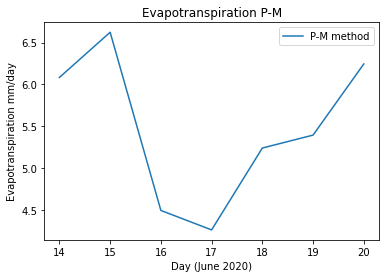

In [99]:
fig, ax = plt.subplots()
ax.plot(avg['ETo'], label='P-M method')
ax.set_xticklabels(avg.index.day)
ax.set_ylabel('Evapotranspiration mm/day')
ax.set_xlabel('Day (June 2020)')
plt.title('Evapotranspiration P-M')
plt.legend()

The evapotranspiration in mm was similar to the evaportranspiration in June of 2012. For example, the middle of the graph is a depression with a rise shortly after. However, the tail is different with ET rising in 2020 and falling in 2012. 

In [100]:
def P_T_function(slope, Net_radiation):
    PETpt = (1.26*slope*(Net_radiation))/((1000*2.45)*(slope+0.066))
    return PETpt

In [101]:
avg['P_T'] = avg[['slope', 'Net Radiation']].apply(lambda x: P_T_function(*x), axis=1)

In [102]:
avg['P_T'] = avg['P_T']*1000

In [103]:
avg['P_T']

julian time
2020-06-14 00:00:00+00:00    7.374335
2020-06-15 00:00:00+00:00    7.993239
2020-06-16 00:00:00+00:00    5.408412
2020-06-17 00:00:00+00:00    5.132999
2020-06-18 00:00:00+00:00    6.326233
2020-06-19 00:00:00+00:00    6.547790
2020-06-20 00:00:00+00:00    7.609322
Name: P_T, dtype: float64

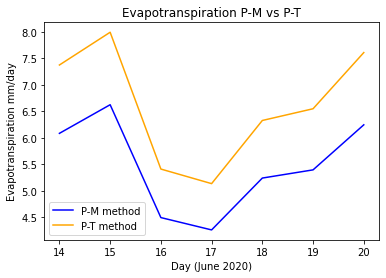

In [104]:
fig2, ax2 = plt.subplots()
ax2.plot(avg['ETo'], label='P-M method', color='blue')
ax2.plot(avg['P_T'], label='P-T method', color='orange')
ax2.set_xticklabels(avg.index.day)
ax2.set_ylabel('Evapotranspiration mm/day')
ax2.set_xlabel('Day (June 2020)')
plt.title('Evapotranspiration P-M vs P-T')
plt.legend()

Similar to the previous analysis, the P-M method closely follows the P-T method in estimating ET. However, interestingly this graph shows a larger estimation for the P-T method compared to P-M. This is the inverse of what happened in the 2012 data. 